In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans

import scipy
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
wine = datasets.load_wine()
x = wine.data[:,[1,2]]

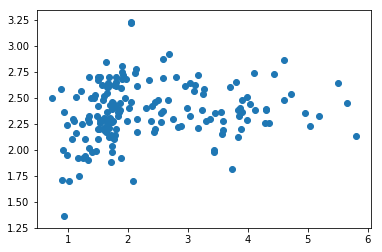

In [3]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [4]:
def plot_2d_clusters(centers, x, clusters):
    for k in range(len(centers)):
        plt.scatter(x[:,0][clusters == k], x[:,1][clusters == k])
    plt.scatter(centers[:,0], centers[:,1], marker='x', s=100)
    plt.show()

## Sklearn K-Means

In [5]:
K = 3
km = KMeans(K)
cl = km.fit_predict(x)

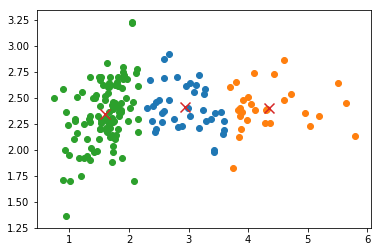

In [6]:
plot_2d_clusters(km.cluster_centers_, x, cl)

In [7]:
km.inertia_

40.91458340326341

In [8]:
d = []
for k in range(1,11):
    d.append([k, KMeans(k).fit(x).inertia_])
d = np.array(d)

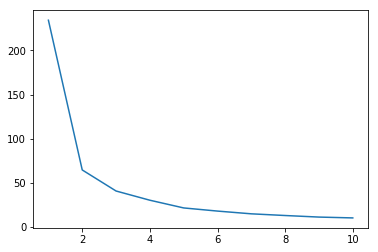

In [9]:
plt.plot(d[:,0], d[:,1])
plt.show()

## K-Means in steps

In [10]:
K = 3

Pick random K points as initial cluster centers

In [11]:
C = x[np.random.choice(range(len(x)), K)]

Calculate point distances to cluster centers

In [12]:
D = np.zeros((len(x),K))
for i, c in enumerate(C):
    D[:,i] = np.sum(np.power(x - c, 2), axis=1)

Convert distances to clusters

In [13]:
cl = np.argmin(D,axis=1)

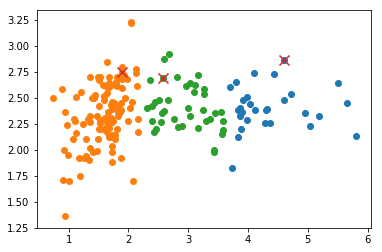

In [14]:
plot_2d_clusters(C, x, cl)

Re-align cluster centers

In [15]:
for k in range(K):
    C[k] = np.mean(x[cl == k], axis=0)

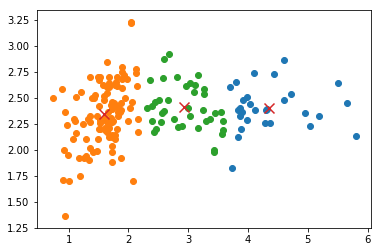

In [16]:
plot_2d_clusters(C, x, cl)

## K-Means

In [17]:
def K_Means(K, X):
    
    C = X[np.random.choice(range(len(X)), K)]
    
    while True:

        C_prev = np.copy(C)
        
        # E-step
        D = np.zeros((len(X),K))
        for i, c in enumerate(C):
            D[:,i] = np.sum(np.power(X - c, 2), axis=1)
        cl = np.argmin(D, axis=1)

        # M-step
        for k in range(K):
            if np.any(cl == k):
                C[k] = np.mean(X[cl == k], axis=0)

        # plot_2d_clusters(C, x, cl)
            
        if np.all(C == C_prev): break
        
    D = np.zeros((len(X),K))
    for i, c in enumerate(C):
        D[:,i] = np.sum(np.power(X - c, 2), axis=1)
        
    return np.sum(np.min(D, axis=1)), C, cl

In [18]:
d, C, cl = K_Means(3, x)

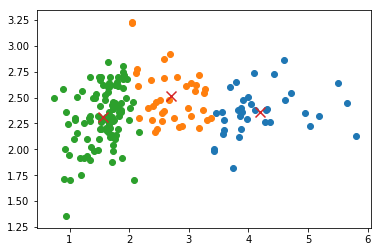

In [19]:
plot_2d_clusters(C, x, cl)

In [20]:
d

41.83388801169591

In [21]:
D = []
for k in range(1, 11):
    d, _, _ = K_Means(k, x)
    D.append([k, d])
D = np.array(D)

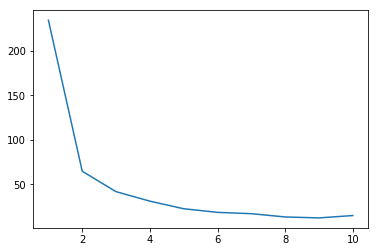

In [22]:
plt.plot(D[:,0], D[:,1])
plt.show()

## K-Means++

In [23]:
X_ = np.array([0,1,2,3,4])
X_

array([0, 1, 2, 3, 4])

In [24]:
C_ = [X_[0]]
C_

[0]

In [25]:
D_ = [min([scipy.inner(c-x,c-x) for c in C_]) for x in X_]
D_

[0, 1, 4, 9, 16]

In [26]:
P_ = D_ / np.sum(D_)
P_

array([0.        , 0.03333333, 0.13333333, 0.3       , 0.53333333])

In [27]:
np.random.choice(X_, p = P_)

4

In [28]:
def initialize(K, X):
    C = [X[0]]
    for k in range(1, K):
        D = [min([scipy.inner(c-x,c-x) for c in C]) for x in X]
        P = D / np.sum(D)
        C.append(X[np.random.choice(range(len(X)), p = P)])
    return C

In [29]:
initialize(3, X_)

[0, 2, 4]

In [30]:
def K_Means_pp(K, X):
    
    C = initialize(K, X)
    
    while True:

        C_prev = np.copy(C)
        
        # E-step
        D = np.zeros((len(X),K))
        for i, c in enumerate(C):
            D[:,i] = np.sum(np.power(X - c, 2), axis=1)
        cl = np.argmin(D, axis=1)

        # M-step
        for k in range(K):
            if np.any(cl == k):
                C[k] = np.mean(X[cl == k], axis=0).tolist()

        # plot_2d_clusters(C, x, cl)
            
        if np.all(C == C_prev): break
        
    D = np.zeros((len(X),K))
    for i, c in enumerate(C):
        D[:,i] = np.sum(np.power(X - c, 2), axis=1)
        
    return np.sum(np.min(D, axis=1)), np.array(C), cl

In [31]:
d, C, cl = K_Means_pp(3, x)

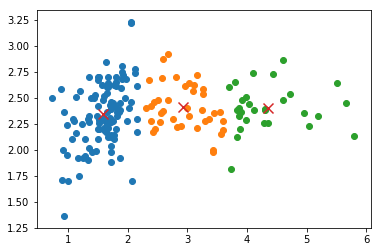

In [32]:
plot_2d_clusters(C, x, cl)

In [33]:
d

40.91458340326341

In [34]:
D = []
for k in range(1, 11):
    d, _, _ = K_Means_pp(k, x)
    D.append([k, d])
D = np.array(D)

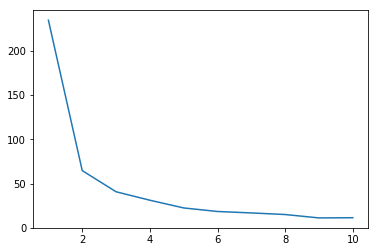

In [35]:
plt.plot(D[:,0], D[:,1])
plt.show()